# Introduction

Important Info:

Hi and welcome to the Sportlogiq DA Questionnaire! The goal with this questionnaire is to assess your problem solving, hockey knowledge, attention to detail, coding/stats abilities and your (hopeful) fit with some of our day-to-day tasks. If you find yourself stuck or unsure on a question, showing your work and explaining your problem solving/decision making is still highly recommended.

Libraries:
- You'll want to import libraries such as numpy, pandas, a plotting library like plotly/matplotlib, and a stats library of your choosing (sklearn for example)

Data Info:
- There are two data files & a rink template for scatter plots. One data file has a condensed event set from a randomly chosen hockey game and the other contains Expected Goals values (xG) to be merged onto shot attempts for this game. **If an xG value does not correspond to a shot event, it should not be counted**

- X and Y Coordinates are in feet and are adjusted such that both teams attack from left (dz) to right (oz)
    - X values range from -100 (end boards behind the DZ net) to 0 (centre ice) and 100 (end boards behind the OZ net)
    - Y values range from -42.5 (west side boards) to 0 (centre ice) and 42.5 (east side boards)
    - **When creating scatter plots, please use these coordinates along with the provided rink_template to display the full rink**

- Binary columns that have values of 0 or 1 indicate 0=No, 1=Yes

- Successfull passes are completed passes, successful shots are shots on net

- Compiledgametime is in seconds, periods are 20 minutes long, except for overtime which is 5 minutes or less

Please show all work, **keep written answers succinct and to the point** and most of all, thanks for your time and good luck!

-----

* Importing the necessary libraries
* Loading the data.
* Config the environment.

In [634]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_events= pd.read_csv('DA_Tutorial_24.csv')
df_expected_goals = pd.read_csv('DA_Tutorial_24_xg.csv')

df = pd.merge(df_events, df_expected_goals, on='compiledgametime', how='left', validate='one_to_one')
df.head(20)

df = df.drop(columns=['playerid_y'])
df = df.rename(columns={'playerid_x': 'playerid'})

# remove events that are not shots
df[(df['xg'].notnull()) & (df['eventname'] != 'shot')] = np.nan


# Create a function to plot the rink
def draw_rink(plot):
  image = plot.imread('rink_template.png')
  x_rink_range = [-100, 100]
  y_rink_range = [-42.5, 42.5]
  plot.imshow(image, extent=[x_rink_range[0], x_rink_range[1], y_rink_range[0], y_rink_range[1]])

df


,eventname,outcome,type,compiledgametime,playsection,zone,manpowersituation,goal,teamid,playerid,opposingteamgoalieoniceid,xadjcoord,yadjcoord,xg
0,pass,successful,south,0.733333,southCenterNZ,nz,evenStrength,0.0,311.0,111452.0,80264.0,-2.316772,9.808823,NaN
1,reception,successful,regular,1.333333,centerPointDZ,dz,evenStrength,0.0,311.0,80.0,80264.0,-26.457947,6.791176,NaN
2,pass,successful,stretchoffboards,2.566667,westPointDZ,dz,evenStrength,0.0,311.0,80.0,80264.0,-30.481476,30.932352,NaN
3,reception,successful,regular,3.166667,northEastBoardsNZ,nz,evenStrength,0.0,311.0,111452.0,80264.0,3.718521,35.458824,NaN
4,pass,successful,outlet,5.433333,innerSlotDZ,dz,evenStrength,0.0,315.0,80264.0,5152.0,-81.171463,3.770588,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,pass,successful,south,3835.400000,eastPoint,oz,powerPlay,0.0,315.0,126723.0,5152.0,51.497932,40.488235,NaN
1793,reception,successful,regular,3836.266600,centerPoint,oz,powerPlay,0.0,315.0,20775372.0,5152.0,32.386169,5.785294,NaN
1794,pass,successful,north,3837.966600,centerPoint,oz,powerPlay,0.0,315.0,20775372.0,5152.0,33.392052,-7.794117,NaN
1795,reception,successful,regular,3838.733400,outsideNorthWest,oz,powerPlay,0.0,315.0,81408.0,5152.0,62.051838,-26.402939,NaN


---

## Q1) 

a) Which teamid won the game, what was the score, which period was the winning goal scored in?

b) Limited to the period where the winning goal was scored, create a scatter plot for the winning team's shot attempts in that period and highlight the winning goal in a different colour.

---

To answer that question, we have to get the columns `teamid` and `goal` and count each one has more goals

In [635]:
where_goal = df['goal'] == 1
df_goals = df[where_goal]
game_final_result = df_goals[['teamid', 'goal']].value_counts()
game_final_result

teamid  goal
315.0   1.0     4
311.0   1.0     3
Name: count, dtype: int64

To check when was scored the winning goal we have to filter the goals, sort the results by the column `compiledgametime` descending and them, get the first one. 

In [636]:
goals = df_goals[['teamid', 'goal', 'compiledgametime', 'playerid', 'xadjcoord', 'yadjcoord']].sort_values(by='compiledgametime', ascending=False)
winning_goal = goals.iloc[0]
winning_team = winning_goal['teamid']
winning_goal

teamid                315.000000
goal                    1.000000
compiledgametime     3838.766600
playerid            81408.000000
xadjcoord              62.562599
yadjcoord             -25.900000
Name: 1796, dtype: float64

The winning goal was scored as the time `3838.7666` seconds. But, to calculate the period was that, first we have to check is it was at regular time:  

In [637]:
period_duration_seconds = 20 * 60
period_winning_goal = winning_goal['compiledgametime'] / period_duration_seconds
period_winning_goal


3.1989721666666666

As we can see, the goal was scored after the 3rd period, so it was scored in the overtime. We can calculate the period by dividing the time by 300 seconds (5 minutes) and rounding up the result:

In [638]:
overtime_duration_seconds = 5 * 60
overtime_winning_goal = (winning_goal['compiledgametime'] % period_duration_seconds) / overtime_duration_seconds
overtime_winning_goal

0.7958886666666665

The winning goal was scored in the 4th period (1st period of the overtime)

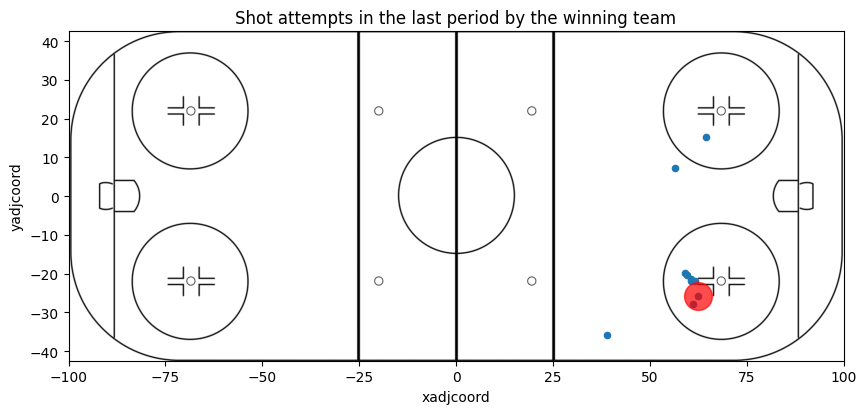

In [639]:
# Limited to the period where the winning goal was scored, 
# create a scatter plot for the winning team's 
# shot attempts in that period and highlight the winning goal in a different colour.

initial_time = 3 * period_duration_seconds
final_time = 4 * period_duration_seconds
where_period = (df['compiledgametime'] >= initial_time) & (df['compiledgametime'] <= final_time)
where_winning_team = df['teamid'] == winning_team
where_shot = df['eventname'] == 'shot'

# Filter the data frame to include only the winning team's shot attempts in the last period
df_last_period_shots_winning_team = df[where_period & where_winning_team & where_shot]


# Create a scatter plot for the winning team's shot attempts in the last period
scatter = df_last_period_shots_winning_team.plot.scatter(x='xadjcoord', y='yadjcoord', figsize=(10, 10))

# Highlight the winning goal in a different colour
scatter.plot(
  winning_goal['xadjcoord'],
  winning_goal['yadjcoord'],
  'ro',
  markersize=20,
  alpha=0.7)



plt.title('Shot attempts in the last period by the winning team')
draw_rink(plt)



----

## A1)

a)
  * As we can see, the **teamid 315** won the game with the score **4 x 3**.
  * The winning goal was scored at the **4th period** (**1st period of the overtime**)

b) The image is generated above

-----


## Q2)

a) Which playerid scored the winning goal? 

b) Create a scatter plot for all of this player's powerplay shot attempts for the full game.

c) If we told you these were Alex Ovechkin's powerplay shot attempts, what would you need to do to the Y coordinates for these attempts to appear from "Ovi's Office"? Please re-create the scatter plot accordingly.

In [640]:
# using the same variable was created in the previous cell
player_winning_goal = int(winning_goal['playerid'])
player_winning_goal

81408

In [641]:
# Creating a dataframe with the shot attempt for the player who scored the winning goal
where_player_winning_goal = df['playerid'] == player_winning_goal
where_shot = df['eventname'] == 'shot'
where_power_play = df['manpowersituation'] == 'powerPlay'

df_player_winning_goal = df[where_player_winning_goal & where_shot & where_power_play]
#df_player_winning_goal

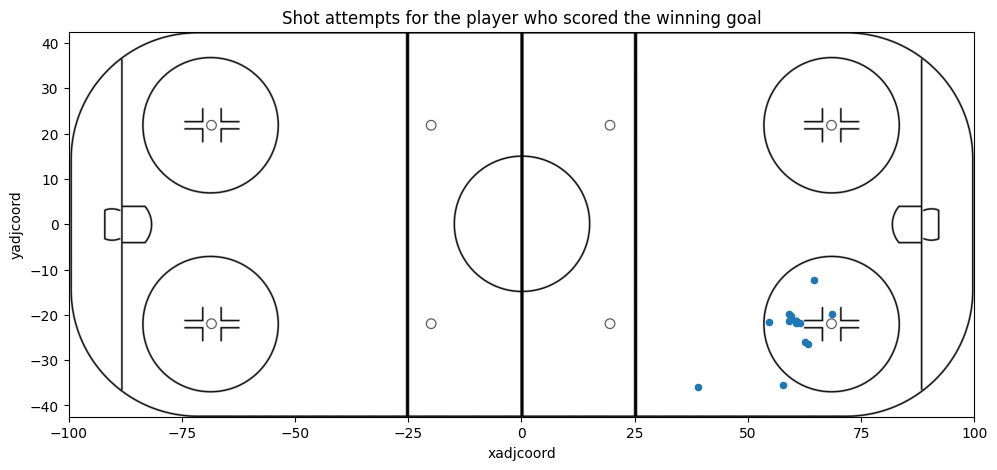

In [642]:
num_rows = 1
num_cols = 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5))
df_player_winning_goal.plot.scatter(x='xadjcoord', y='yadjcoord', ax=axs)
plt.title('Shot attempts for the player who scored the winning goal')
draw_rink(plt)

---

### Question 2.C
If we told you these were Alex Ovechkin's powerplay shot attempts, what would you need to do to the Y coordinates for these attempts to appear from "Ovi's Office"? Please re-create the scatter plot accordingly.

---

"Ovi's Office" refers to the spot on the ice where Alex Ovechkin is famously known for taking many of his powerplay shots. This is typically from the left face-off circle, also known as the "left circle" or "left dot."

So, to move the shots to the "Ovi's Office", we have to move the shots to the left side of the rink. So, we can use the absolute value of the Y coordinates.


C:\Users\rvarj\AppData\Local\Temp\ipykernel_10448\1631594503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player_winning_goal['yadjcoord_ovis_office'] = df_player_winning_goal['yadjcoord'].apply(lambda y: np.abs(y))


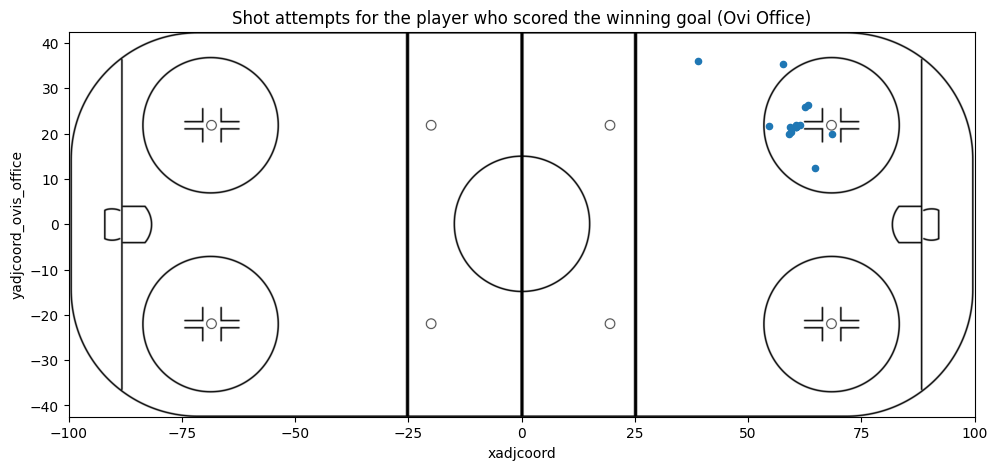

In [643]:
num_rows = 1
num_cols = 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5))
df_player_winning_goal['yadjcoord_ovis_office'] = df_player_winning_goal['yadjcoord'].apply(lambda y: np.abs(y))

df_player_winning_goal.plot.scatter(x='xadjcoord', y='yadjcoord_ovis_office', ax=axs)
plt.title('Shot attempts for the player who scored the winning goal (Ovi'' Office)')
draw_rink(plt)

## A2)

a) The playerid that scored the winning goal was the **playerid 81408**

b) The image is generated above

c) The image is generated above



---

## Q3)

a) The Assistant Coach wants to know how each team's even strength pass completion rate breaks down in each zone (please use the zone of pass origin). Build a simple visual to display this information for them in a clear and digestible way. 

b) Which zone was more difficult to complete passes in at even strength, why do you think that is? 

c) What was each goalie id's slot save percentage? (the slot includes innerSlot, westOuterSlot, & eastOuterSlot)

---

a) The Assistant Coach wants to know how each team's even strength pass completion rate breaks down in each zone (please use the zone of pass origin). Build a simple visual to display this information for them in a clear and digestible way. 

To answer this question, we have to group the data by the columns `teamid` and `zone` and calculate the mean of the column `passcomplete`.

---

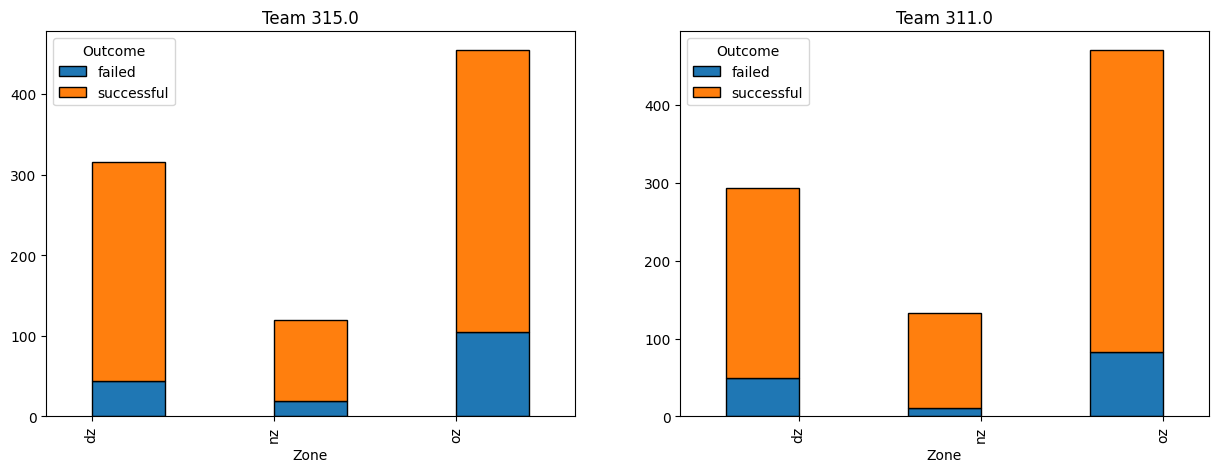

In [644]:
# creating a dataframe with the data we need
df_pass = df[df['eventname'] == 'pass']


df_passes_winning_team = df[df['teamid'] == winning_team]
df_passes_not_winning_team = df[df['teamid'] != winning_team]

datasets = [df_passes_winning_team, df_passes_not_winning_team]
num_rows = 1
num_cols = len(datasets)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5))

for i, temp_df in enumerate(datasets):
  pivot = pd.pivot_table(temp_df, index='zone', columns='outcome', values='eventname', aggfunc='count')
  chart = pivot.plot.bar(
    stacked=True,
    ax=axs[i],
    position=i,
    width=0.4,
    edgecolor='black',
  )
  chart.legend(title='Outcome')
  chart.set_title(f'Team {temp_df["teamid"].iloc[0]}')
  chart.set_xlabel('Zone')
  

plt.show()

---
To analyze the slot save of each goalie, we have to filter the events that are shots and are in the slot and that are successful outcome 



In [645]:
#c) What was each goalie id's slot save percentage? (the slot includes innerSlot, westOuterSlot, & eastOuterSlot)

df_slot_shots = df[
  (df['eventname'] == 'shot') &
  (df['outcome'] == 'successful') &
  (df['playsection'].isin(['innerSlot', 'westOuterSlot', 'eastOuterSlot']))
]

goalie_stats = df_slot_shots.groupby('opposingteamgoalieoniceid').apply(
  lambda x: pd.Series({
      'shots_against': len(x),
      'saves': (x['goal'] == 0).sum(),
      'goals_against': (x['goal'] == 1).sum(),
      'save_percentage': ((x['goal'] == 0).sum() / len(x)) * 100
  })
)

goalie_stats


,shots_against,saves,goals_against,save_percentage
opposingteamgoalieoniceid,,,,
5152.0,12.0,11.0,1.0,91.666667
80264.0,13.0,11.0,2.0,84.615385


# A3)
a) The image is generated above

b) Which zone was more difficult to complete passes in at even strength, why do you think that is? 

The zone that was more difficult to complete passes was the **opponent zone**.It make sense because the opponent zone is the zone that the team has to pass the puck to get a shot on goal. So, the opponent team will try to intercept the passes to avoid the shot.

c) What was each goalie id's slot save percentage? (the slot includes innerSlot, westOuterSlot, & eastOuterSlot)

The goalies save percentage are:

| player_id | Shots Against |	Saves	| Goals Against	| Save Percentage (%)
|-----------|---------------|-------|--------------|----------------
| 5152	| 12.0	| 11.0	| 1.0	| 91.67 |
| 80264	| 13.0	| 11.0	| 2.0	| 84.61 |


---


## Q4)

a) Assuming the centre of the net is at X=89 (goal line), Y=0 (centre ice), what was the average shot distance for each team for shots **from the outside north west playsection** to the centre of the net?

b) What was each goalie's Goals Saved Above Expected from the outside north west playsection? What does this tell us about their performance from this area?

---

To calculate the distance of the shot to the goal, we can use the Pythagorean theorem. The distance is the square root of the sum of the squares of the X and Y coordinates:

In [646]:
# Adding a column called distance
goal_x = 89
goal_y = 0

df['goal_distance'] = np.sqrt((df['xadjcoord'] - goal_x) ** 2 + (df['yadjcoord'] - goal_y) ** 2)


In [647]:
# Filtering the data frame to include only the shot attempts
where_shot = df['eventname'] == 'shot'
where_outside_north_west = df['playsection'] == 'outsideNorthWest'
df_shots = df[where_shot]

df_nw_shots = df[where_shot & where_outside_north_west]


# Creating a pivot table with the average distance for each shot type
pivot = pd.pivot_table(df_nw_shots, index='teamid', values='goal_distance', aggfunc='mean')
pivot

,goal_distance
teamid,
311.0,32.740408
315.0,35.573745


In [648]:
# b) What was each goalie's Goals Saved Above Expected
# from the outside north west playsection?
# What does this tell us about their performance from this area?

goalie_stats_nw = df_nw_shots.groupby('opposingteamgoalieoniceid').apply(
    lambda x: pd.Series({
        'total_xG': x['xg'].sum(),
        'goals_against': (x['goal'] == 1).sum()
    })
)

goalie_stats_nw['GSAx'] = goalie_stats_nw['total_xG'] - goalie_stats_nw['goals_against']

goalie_stats_nw['GSAx']

opposingteamgoalieoniceid
5152.0    -1.455582
80264.0   -0.630304
Name: GSAx, dtype: float64

---
## A4)

a)

	
| teamid | Average Shot Distance (feet) |
|--------|------------------------------|
| 311    |	32.74 |
| 315    |	35.57 |


b)

| player_id |	GSAx (Goals Saved Above Expected) |
|-----------|------------------------------------|
| 5152	| -1.525527 |
| 80264	| -0.670028 |

Negative GSAx: Both goalies have negative GSAx values, indicating that they allowed more goals than expected based on the quality of shots they faced from the outside northwest playsection.

---

## Q5)

a) If a "Shot Assist" is defined as a sequence of events where there is: 

  1. a successful pass followed by
  2. a successful reception by a *teammate* and then without giving up the puck
  3. the receiving player has a shot attempt, create a column flagging shots that have a Shot Assist.
  
How many shot attempts did playerid 7380 have that were assisted?

b) For shots that were assisted, if the full xG value from the shot attempt was credited to the passer for their successful pass (shot assist), which passer created the most xG for their teammates?

c) Plot a single diagram of this passer's shot assists (pass to reception) and their corresponding shots (reception to shot).

Hint: Don't forget what you learned about plotting Y coordinates.

In [649]:
# creating a column that flag a successful reception by a team mate:

df.at[df.index[0], 'shot_assist'] = 0
df.at[df.index[1], 'shot_assist'] = 0

# Loop through the data frame to flag a successful pass that led to a successful reception and a shot
for i in range(1, len(df) - 1):
  step_pass = i - 1
  step_reception = i
  step_shot = i + 1
  is_successful_pass = df.iloc[step_pass]['eventname'] == 'pass' and df.iloc[step_pass]['outcome'] == 'successful'
  is_successful_reception = df.iloc[step_reception]['eventname'] == 'reception' and df.iloc[step_reception]['outcome'] == 'successful' and df.iloc[step_reception]['teamid'] == df.iloc[step_pass]['teamid']
  is_shot = df.iloc[step_shot]['eventname'] == 'shot' and df.iloc[step_shot]['teamid'] == df.iloc[step_reception]['teamid']
  if is_successful_pass and is_successful_reception and is_shot:
    
    df.at[df.index[step_reception], 'shot_assist'] = 1
    # copying the xG value from the shot to the pass
    df.at[df.index[step_pass], 'xg_pass_assist'] = df.iloc[step_shot]['xg']
    # copying the playerid who made the pass to the shot
    df.at[df.index[step_shot], 'pass_assistant'] = df.iloc[step_pass]['playerid']
    df.at[df.index[step_shot], 'xadjcoord_pass_assist'] = df.iloc[step_pass]['xadjcoord']
    df.at[df.index[step_shot], 'yadjcoord_pass_assist'] = df.iloc[step_pass]['yadjcoord']
  else:
    df.at[df.index[step_reception], 'shot_assist'] = 0

df

,eventname,outcome,type,compiledgametime,playsection,zone,manpowersituation,goal,teamid,playerid,opposingteamgoalieoniceid,xadjcoord,yadjcoord,xg,goal_distance,shot_assist,xg_pass_assist,pass_assistant,xadjcoord_pass_assist,yadjcoord_pass_assist
0,pass,successful,south,0.733333,southCenterNZ,nz,evenStrength,0.0,311.0,111452.0,80264.0,-2.316772,9.808823,NaN,91.842071,0.0,NaN,NaN,NaN,NaN
1,reception,successful,regular,1.333333,centerPointDZ,dz,evenStrength,0.0,311.0,80.0,80264.0,-26.457947,6.791176,NaN,115.657501,0.0,NaN,NaN,NaN,NaN
2,pass,successful,stretchoffboards,2.566667,westPointDZ,dz,evenStrength,0.0,311.0,80.0,80264.0,-30.481476,30.932352,NaN,123.420555,0.0,NaN,NaN,NaN,NaN
3,reception,successful,regular,3.166667,northEastBoardsNZ,nz,evenStrength,0.0,311.0,111452.0,80264.0,3.718521,35.458824,NaN,92.359400,0.0,NaN,NaN,NaN,NaN
4,pass,successful,outlet,5.433333,innerSlotDZ,dz,evenStrength,0.0,315.0,80264.0,5152.0,-81.171463,3.770588,NaN,170.213231,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,pass,successful,south,3835.400000,eastPoint,oz,powerPlay,0.0,315.0,126723.0,5152.0,51.497932,40.488235,NaN,55.187882,0.0,NaN,NaN,NaN,NaN
1793,reception,successful,regular,3836.266600,centerPoint,oz,powerPlay,0.0,315.0,20775372.0,5152.0,32.386169,5.785294,NaN,56.908659,0.0,NaN,NaN,NaN,NaN
1794,pass,successful,north,3837.966600,centerPoint,oz,powerPlay,0.0,315.0,20775372.0,5152.0,33.392052,-7.794117,NaN,56.151511,0.0,0.05091,NaN,NaN,NaN
1795,reception,successful,regular,3838.733400,outsideNorthWest,oz,powerPlay,0.0,315.0,81408.0,5152.0,62.051838,-26.402939,NaN,37.726895,1.0,NaN,NaN,NaN,NaN


In [650]:
df_assisted_shots = df[(df['shot_assist'] == 1)]

print('Shot assisted player 7380: ' , df_assisted_shots[df_assisted_shots['playerid'] == 7380].shape[0])

df_assisted_shots['playerid'].value_counts()


Shot assisted player 7380:  0


playerid
81408.0       14
370192.0       8
112050.0       7
79380.0        7
94531.0        7
6588.0         6
111452.0       5
109964.0       5
884.0          4
80518.0        3
20775372.0     3
82048.0        3
80.0           2
202206.0       2
400162.0       2
5814.0         2
179172.0       2
126723.0       2
1731661.0      2
78625.0        2
446706.0       1
113401.0       1
1462.0         1
108339.0       1
110856.0       1
237838.0       1
110409.0       1
54915.0        1
Name: count, dtype: int64

In [651]:
# b) For shots that were assisted, if the full xG value from the shot attempt was credited to the passer
# for their successful pass (shot assist), which passer created the most xG for their teammates?

df_passes = df[df['eventname'] == 'pass']

top_assistants = df_passes.groupby('playerid')['xg_pass_assist'].sum().sort_values(ascending=False).head(10)
top_assistant = top_assistants.index[0]
print('Top assistant player: ', top_assistant)

Top assistant player:  94531.0


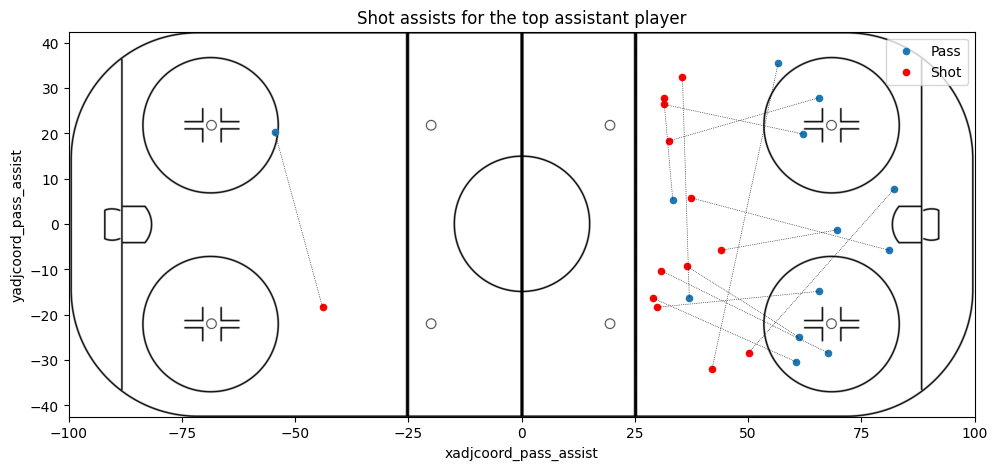

In [652]:
# c) Plot a single diagram of this passer's shot assists (pass to reception)
# and their corresponding shots (reception to shot).
# Hint: Don't forget what you learned about plotting Y coordinates.

num_rows = 1
num_cols = 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5))

df_shot_assisted_top_assitant = df[(df['pass_assistant'] == top_assistant) & (df['eventname'] == 'shot') & (df['xg'].notnull())]
df_shot_assisted_top_assitant.plot.scatter(x='xadjcoord', y='yadjcoord', ax=axs)
df_shot_assisted_top_assitant.plot.scatter('xadjcoord_pass_assist', 'yadjcoord_pass_assist', ax=axs, color='red')

# Plotting a line between the pass and the shot
for i in range(0, len(df_shot_assisted_top_assitant)):
  shot = df_shot_assisted_top_assitant.iloc[i]
  pass_x = shot['xadjcoord_pass_assist']
  pass_y = shot['yadjcoord_pass_assist']
  shot_x = shot['xadjcoord']
  shot_y = shot['yadjcoord']
  plt.plot([pass_x, shot_x], [pass_y, shot_y], lw=0.5, alpha=1, color='black', linestyle=':')


plt.title('Shot assists for the top assistant player')
plt.legend(['Pass', 'Shot'])
draw_rink(plt)


---

## A5)

### a) There's no player with the `playerid 7380` in the dataset
### b) The player with the most xG created for their teammates was the player with the `playerid 94531`
### c) The image is generated above

---

## Q6)
### a) Which team won the xG battle and how much xG did each teamid have?
### b) Given who won the game, what does this tell you about how the game went?

In [653]:
df.groupby(['teamid'])['xg'].sum()

teamid
311.0    3.674770
315.0    2.675058
Name: xg, dtype: float64

In [654]:
# Analysing the team's performance in terms event types and outcome

team_stats = pd.pivot_table(df,
                            index=['eventname', 'outcome'],
                            columns=['teamid'],
                            values='compiledgametime',
                            aggfunc='count',
                            )
team_stats

teamid                311.0  315.0
eventname outcome                 
pass      failed        104    126
          successful    361    345
reception failed          7     10
          successful    363    349
shot      failed         32     32
          successful     30     29

## A6)

a)
| teamid | xG |
|--------|----|
| 311    | 3.67 |
| 315    | 2.675058 |

b) Even that the teamid 315 won the game, the teamid 311 had more xG than the teamid 315. This indicates that the teamid 311 had better quality shots than the teamid 315, but the teamid 315 was more efficient in scoring goals.

As we can see at result:

|Event name | Outcome | teamid 311 | teamid 315 |
|-----------|---------|------------|------------|
| pass      | failed  | 104        | 126        |
|           | successful | 361      | 345        |
| reception | failed  | 7          | 10         |
|           | successful | 363      | 349        |
| shot      | failed  | 32         | 32         |
|           | successful | 30       | 29         |



---------------

## Q7) 

### a) With the information provided in the data files and the columns you've been asked to create in the questions above, use a statistical technique of your choice to show the highest predictors of a goal within this dataset (what would use if you were building an xG model).

### b) Please explain your reasoning for your choices in answering 7a) and then explain your findings like you were talking to the Assistant Coach.

### Hint: look back at the columns you were asked to create, along with the information already provided in the event dataset, what would lead to dangerous shot attempts? Are there other features from a pass-reception-shot sequence (for example) that would be easy to create with the information provided?

-----
We can generate a heatmap to check the correlation between the columns and the column `goal`:


<Axes: >

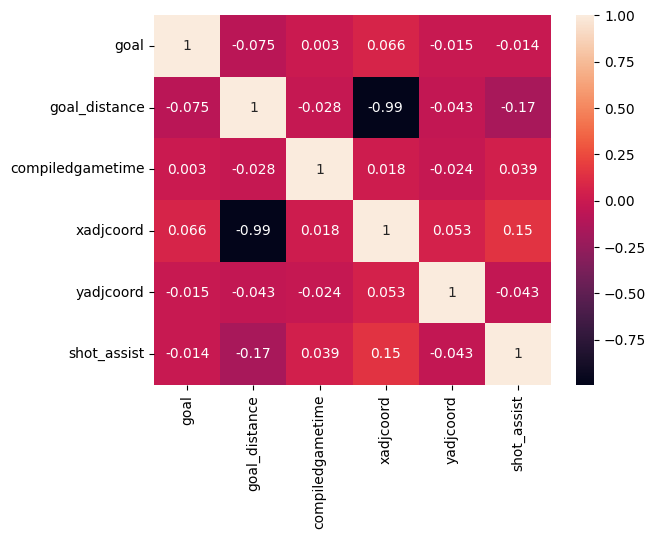

In [655]:
df_corr = df[[
    'goal',
    'goal_distance',
    'compiledgametime',
    'xadjcoord',
    'yadjcoord',
    'shot_assist',
]]

df_correlations = df_corr.corr()
sns.heatmap(df_correlations,annot=True)


----
#### Analyzing pass, shot and reception of each team:

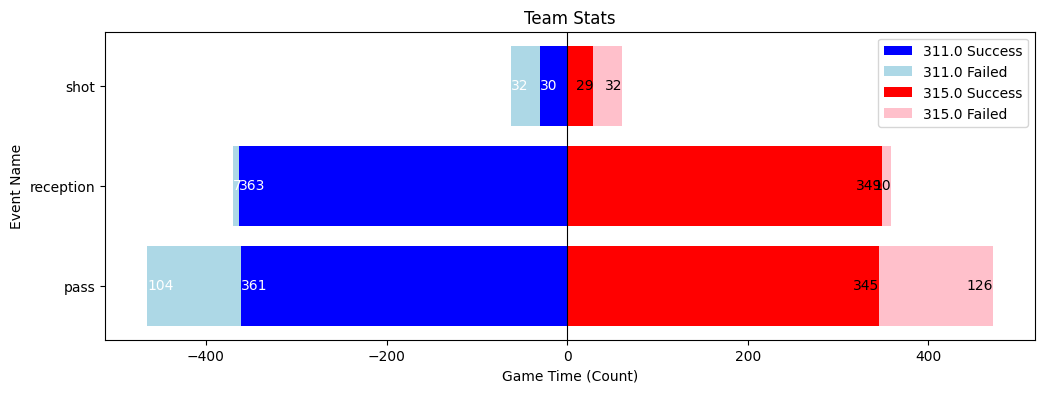

In [656]:
stats = df[['eventname', 'teamid', 'outcome', 'goal', 'goal_distance', 'compiledgametime', 'xadjcoord', 'yadjcoord', 'zone']]

pivot = pd.pivot_table(stats, index=['teamid', 'eventname'], columns='outcome', values='compiledgametime', aggfunc='count')

# Split the data for each team
teams = pivot.index.get_level_values('teamid').unique()
team1_data = pivot.xs(teams[0], level='teamid')
team2_data = pivot.xs(teams[1], level='teamid')

# Create subplots
fig, ax = plt.subplots(figsize=(12, 4))

# Plot success and failed outcomes for team1 from center to left
if 'successful' in team1_data.columns:
    ax.barh(team1_data.index, -team1_data['successful'], color='blue', label=f'{teams[0]} Success')
    for index, value in enumerate(team1_data['successful']):
        ax.text(-value, index, str(value), va='center', ha='left', color='white')
if 'failed' in team1_data.columns:
    ax.barh(team1_data.index, -team1_data['failed'], left=-team1_data.get('successful', 0), color='lightblue', label=f'{teams[0]} Failed')
    for index, value in enumerate(team1_data['failed']):
        ax.text(-value-team1_data.get('successful', 0).iloc[index], index, str(value), va='center', ha='left', color='white')

# Plot success and failed outcomes for team2 from center to right
if 'successful' in team2_data.columns:
    ax.barh(team2_data.index, team2_data['successful'], color='red', label=f'{teams[1]} Success')
    for index, value in enumerate(team2_data['successful']):
        ax.text(value, index, str(value), va='center', ha='right', color='black')

if 'failed' in team2_data.columns:
    ax.barh(team2_data.index, team2_data['failed'], left=team2_data.get('successful', 0), color='pink', label=f'{teams[1]} Failed')
    for index, value in enumerate(team2_data['failed']):
        ax.text(value+team2_data.get('successful', 0).iloc[index], index, str(value), va='center', ha='right', color='black')


# Customize the plot
ax.set_xlabel('Game Time (Count)')
ax.set_ylabel('Event Name')
ax.set_title('Team Stats')
ax.legend()
ax.axvline(0, color='black', linewidth=0.8)

plt.show()

-----

Now, indepent of the team, we can check where the successfull shots were taken:


In [657]:
import pandas as pd
import matplotlib.pyplot as plt

def draw_events_positions(df_events = df_events, color='blue', plt=plt):
  df_events['count'] = 1

  df_events_pivot = pd.pivot_table(df_events, index='playsection', values='count', aggfunc='sum')

  field_positions = {
      'outsideNorthEast': (50, 42.5),
      'outsideNorthEastDZ': (-50, 42.5),
      'eastPoint': (90, 10),
      'outsideNorthWestDZ': (-50, -42.5),
      'westPoint': (90, -10),
      'outsideNorthWest': (50, -42.5),
      'centerPoint': (0, 0),
      'centerPointDZ': (-100, 0),
      'northCenterNZ': (-50, 0),
      'westPointDZ': (-90, -10),
      'westOuterSlot': (80, -20),
      'southCenterNZ': (50, 0),
      'eastPointDZ': (-90, 10),
      'eastOuterSlot': (80, 20),
      'southEastBoardsNZ': (50, 42.5),
      'northEastBoardsNZ': (-50, 42.5),
      'southWestBoardsNZ': (50, -42.5),
      'innerSlot': (50, 0),
      'westOuterSlotDZ': (-80, -20),
      'northWestBoardsNZ': (-50, -42.5),
      'eastOuterSlotDZ': (-80, 20),
      'innerSlotDZ': (-50, 0)
  }

  # Add positions to DataFrame
  for row in range(len(df_events_pivot)):
      shot_position = df_events_pivot.index[row]
      df_events_pivot.loc[shot_position, 'x'] = field_positions[df_events_pivot.index[row]][0]
      df_events_pivot.loc[shot_position, 'y'] = field_positions[df_events_pivot.index[row]][1]

  # Create lists of x and y coordinates and counts for the scatter plot
  x_coords = df_events_pivot['x']
  y_coords = df_events_pivot['y']
  sizes = df_events_pivot['count'] * 100

  # Plotting
  draw_rink(plt)
  plt.scatter(x_coords, y_coords, s=sizes, c=color, alpha=0.6, edgecolors='w', linewidth=0.5)
  plt.show()


C:\Users\rvarj\AppData\Local\Temp\ipykernel_10448\3002749127.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  draw_events_positions(df_shots[(df['outcome'] == 'successful')], color='blue', ax=plt)


TypeError: draw_events_positions() got an unexpected keyword argument 'ax'

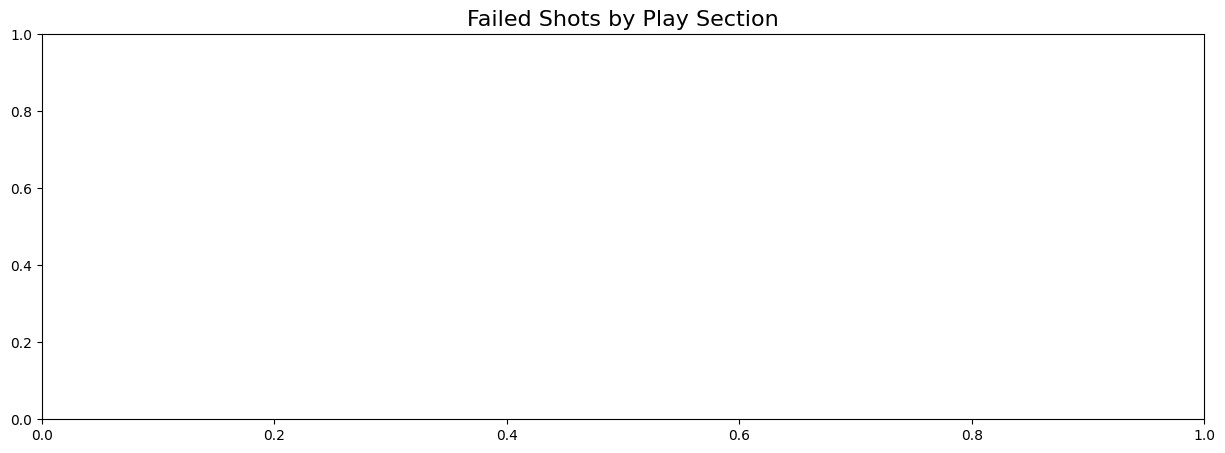

In [658]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title('Failed Shots by Play Section', fontsize=16)
draw_events_positions(df_shots[(df['outcome'] == 'successful')], color='blue', ax=plt)


C:\Users\rvarj\AppData\Local\Temp\ipykernel_10448\2367291182.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  draw_events_positions(df_shots[(df['outcome'] == 'failed')], color='red', ax=plt)
C:\Users\rvarj\AppData\Local\Temp\ipykernel_10448\2331877027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events['count'] = 1


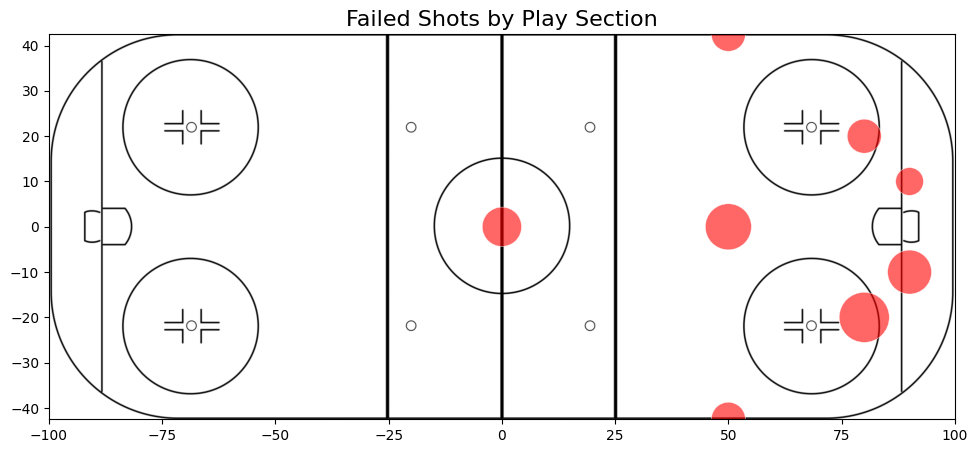

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title('Failed Shots by Play Section', fontsize=16)
draw_events_positions(df_shots[(df['outcome'] == 'failed')], color='red', ax=plt)

C:\Users\rvarj\AppData\Local\Temp\ipykernel_10448\785459408.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  draw_events_positions(df_pass[(df['outcome'] == 'successful')], color='blue', plt=plt)
C:\Users\rvarj\AppData\Local\Temp\ipykernel_10448\4241182781.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events['count'] = 1


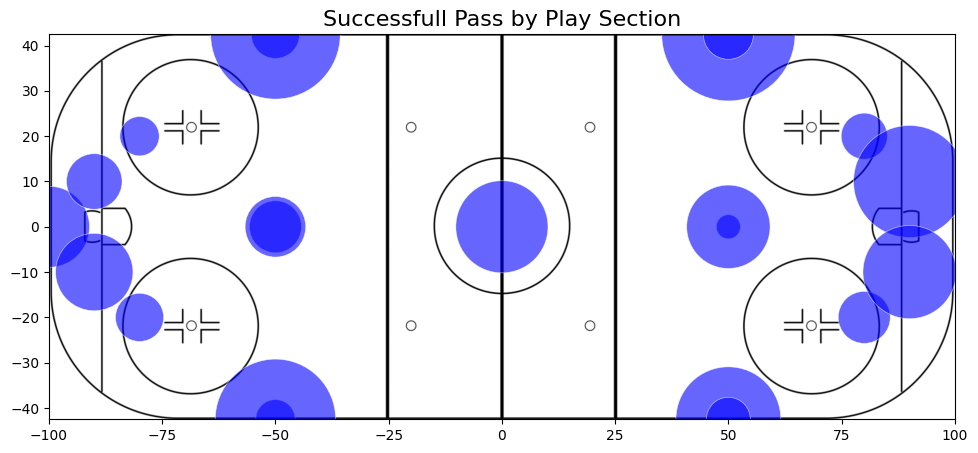

In [ ]:
df_pass = df[df['eventname'] == 'pass']

fig, ax = plt.subplots(figsize=(15, 5))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title('Successfull Pass by Play Section', fontsize=16)
draw_events_positions(df_pass[(df['outcome'] == 'successful')], color='blue', plt=plt)


C:\Users\rvarj\AppData\Local\Temp\ipykernel_10448\3616774316.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  draw_events_positions(df_pass[(df['outcome'] == 'failed')], color='red', plt=plt)
C:\Users\rvarj\AppData\Local\Temp\ipykernel_10448\4241182781.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events['count'] = 1


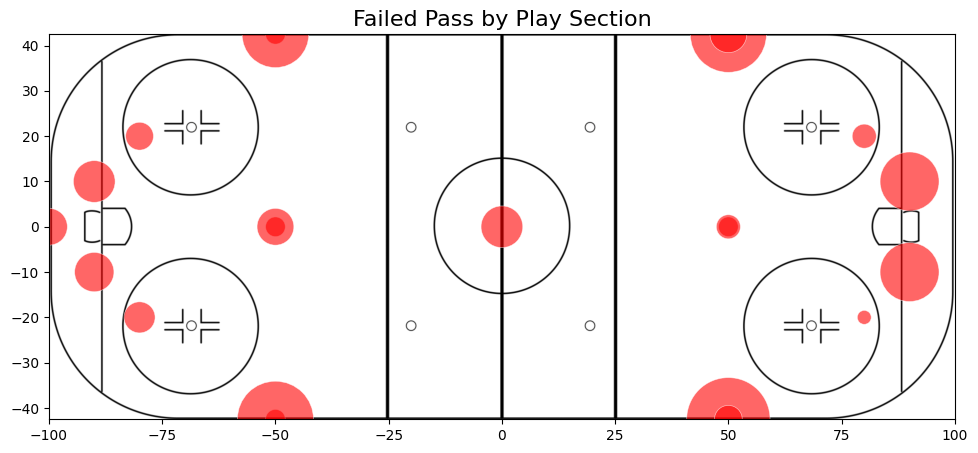

In [ ]:
df_pass = df[df['eventname'] == 'pass']

fig, ax = plt.subplots(figsize=(15, 5))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title('Failed Pass by Play Section', fontsize=16)
draw_events_positions(df_pass[(df['outcome'] == 'failed')], color='red', plt=plt)


----
### Creating an AI model to predict the xG:

goal
0    1790
1       7
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       538
          15       0.00      0.00      0.00         2

    accuracy                           1.00       540
   macro avg       0.50      0.50      0.50       540
weighted avg       0.99      1.00      0.99       540

                   Coefficient
goal_distance        -1.405475
compiledgametime      0.072537
xadjcoord             0.581180
yadjcoord            -0.389463
shot_assist          -0.295986
zone                  0.274606
type                 -0.090689
compiledgametime      0.072537
playsection          -0.003465
manpowersituation    -0.077558


C:\Users\rvarj\AppData\Local\Temp\ipykernel_10448\2439066651.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml[column] = le.fit_transform(df_ml[column])
C:\Users\rvarj\AppData\Local\Temp\ipykernel_10448\2439066651.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml[column] = le.fit_transform(df_ml[column])
C:\Users\rvarj\AppData\Local\Temp\ipykernel_10448\2439066651.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

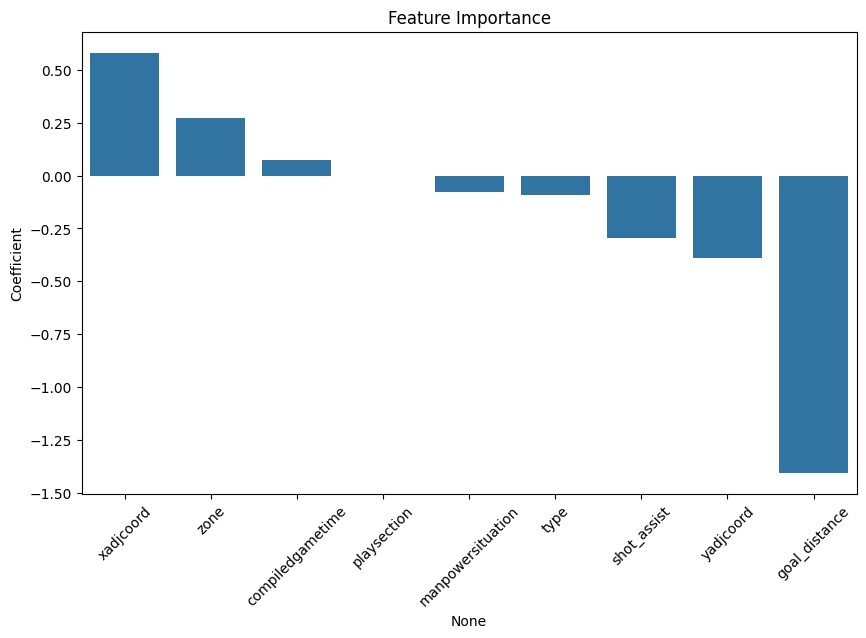

In [663]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler


def get_train_and_test_data(df):
    df['goal'] = df['goal'].apply(lambda x: 1 if x == 1 else 0)
    print(df['goal'].value_counts())
    # Define features and target
    features = [
        'goal_distance',
        'compiledgametime',
        'xadjcoord',
        'yadjcoord',
        'shot_assist',
        'zone',
        'type',
        'compiledgametime',
        'playsection',
        'manpowersituation',
    ]

    target = 'goal'

    df_ml = df[features + [target]]

    # Encode categorical variables
    categorical = df_ml.select_dtypes(include=['object']).columns.tolist()
    for column in categorical:
        le = LabelEncoder()
        df_ml[column] = le.fit_transform(df_ml[column])

    # Scale numerical variables
    numerical = df_ml.select_dtypes(include=['int64', 'float64']).columns.tolist()
    scaler = StandardScaler()
    df_ml[numerical] = scaler.fit_transform(df_ml[numerical])

    # Prepare the data
    X = df_ml.drop(target, axis=1)
    y = df_ml[target]

    y = y.astype(int)

    # Check for any NaN values and fill them
    X = X.fillna(0)
    y = y.fillna(0)
    return X, y

X, y = get_train_and_test_data(df)
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Get the model coefficients
coefficients = pd.DataFrame(log_model.coef_.flatten(), X.columns, columns=['Coefficient'])
print(coefficients)

# Plotting the coefficients for better interpretation
import matplotlib.pyplot as plt
import seaborn as sns

coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y='Coefficient', data=coefficients)
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


goal
0    1790
1       7
Name: count, dtype: int64
   goal_distance  compiledgametime  xadjcoord  yadjcoord  shot_assist  zone   
0       0.015436         -1.714761  -0.129031   0.299205    -0.237635     1  \
1       0.444450         -1.714221  -0.526202   0.184634    -0.237635     0   
2       0.584294         -1.713111  -0.592397   1.101203    -0.237635     0   
3       0.024755         -1.712571  -0.029738   1.273060    -0.237635     1   
4       1.427223         -1.710531  -1.426348   0.069951    -0.237635     0   

   type  compiledgametime  playsection  manpowersituation  
0    19         -1.714761           15                  0  
1    15         -1.714221            1                  0  
2    22         -1.713111           21                  0  
3    15         -1.712571            9                  0  
4     7         -1.710531            7                  0  
0    0
1    0
2    0
3    0
4    0
Name: goal, dtype: int32
Unique values in 'playsection' column: [15  1 21  9  7

C:\Users\rvarj\AppData\Local\Temp\ipykernel_10448\2439066651.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml[column] = le.fit_transform(df_ml[column])
C:\Users\rvarj\AppData\Local\Temp\ipykernel_10448\2439066651.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml[column] = le.fit_transform(df_ml[column])
C:\Users\rvarj\AppData\Local\Temp\ipykernel_10448\2439066651.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

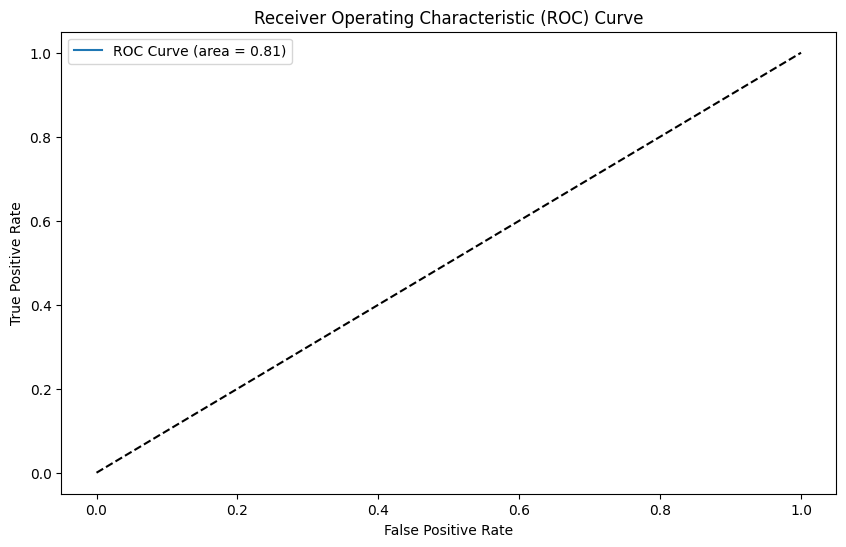

                   Coefficient
goal_distance        -1.405475
compiledgametime      0.072537
xadjcoord             0.581180
yadjcoord            -0.389463
shot_assist          -0.295986
zone                  0.274606
type                 -0.090689
compiledgametime      0.072537
playsection          -0.003465
manpowersituation    -0.077558


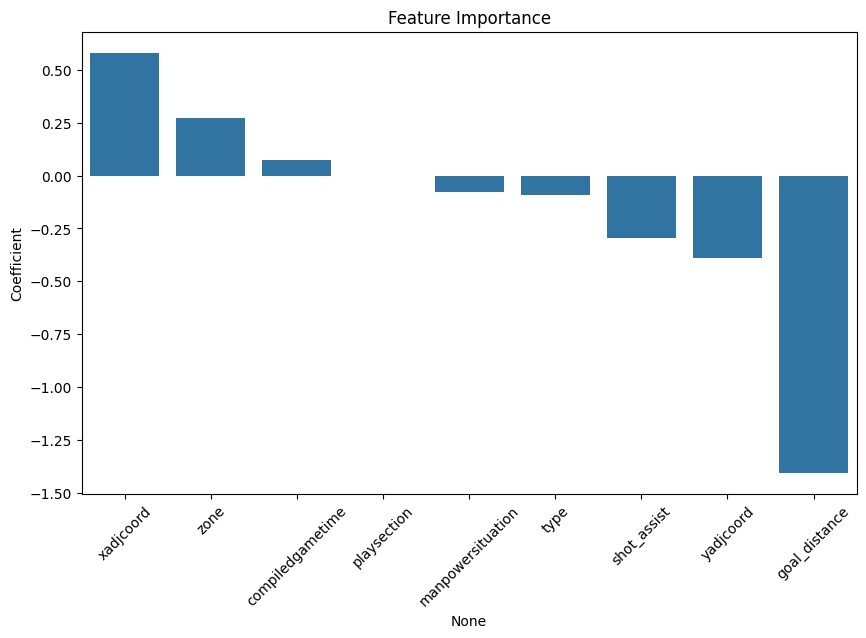

,goal_distance,compiledgametime,xadjcoord,yadjcoord,shot_assist,zone,type,compiledgametime,playsection,manpowersituation,goal,new_xG
0,91.842071,0.733333,-2.316772,9.808823,0.0,nz,south,0.733333,southCenterNZ,evenStrength,0,0.000318
1,115.657501,1.333333,-26.457947,6.791176,0.0,dz,regular,1.333333,centerPointDZ,evenStrength,0,0.000166
2,123.420555,2.566667,-30.481476,30.932352,0.0,dz,stretchoffboards,2.566667,westPointDZ,evenStrength,0,0.000045
3,92.359400,3.166667,3.718521,35.458824,0.0,nz,regular,3.166667,northEastBoardsNZ,evenStrength,0,0.000334
4,170.213231,5.433333,-81.171463,3.770588,0.0,dz,outlet,5.433333,innerSlotDZ,evenStrength,0,0.000052
...,...,...,...,...,...,...,...,...,...,...,...,...
1792,55.187882,3835.400000,51.497932,40.488235,0.0,oz,south,3835.400000,eastPoint,powerPlay,0,0.001784
1793,56.908659,3836.266600,32.386169,5.785294,0.0,oz,regular,3836.266600,centerPoint,powerPlay,0,0.003458
1794,56.151511,3837.966600,33.392052,-7.794117,0.0,oz,north,3837.966600,centerPoint,powerPlay,0,0.010698
1795,37.726895,3838.733400,62.051838,-26.402939,1.0,oz,regular,3838.733400,outsideNorthWest,powerPlay,0,0.003082


In [667]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

X, y = get_train_and_test_data(df)

# Splitting the data into training and
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


# Predict probabilities (xG values) for the test set
y_pred_prob = log_model.predict_proba(X_test)[:, 1]

# Predicting and evaluating the model
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=1)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

# Get the model coefficients
coefficients = pd.DataFrame(log_model.coef_.flatten(), X.columns, columns=['Coefficient'])
print(coefficients)

# Plotting the coefficients for better interpretation
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y='Coefficient', data=coefficients)
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

# Calculate xG (expected goals) for each shot in the entire dataset
df['new_xG'] = log_model.predict_proba(X)[:, 1]

features = [
        'goal_distance',
        'compiledgametime',
        'xadjcoord',
        'yadjcoord',
        'shot_assist',
        'zone',
        'type',
        'compiledgametime',
        'playsection',
        'manpowersituation',
    ]

df[features + ['goal', 'new_xG']]

# Before you submit:

Please check that you have answered all questions (and sub-questions) to the best of your ability and that every answer can be clearly traced back to work that is shown. If you were unable to produce an answer, please describe and show the work you tried.

Thanks for your time, effort and interest and we hope you enjoyed this exercise!